# 1. 라이브러리 및 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 왼쪽에 csv 파일을 집어넣고 경로복사에서 붙여넣기
iris = pd.read_csv("/content/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# 특이사항 있는지 확인
# 결측값, 데이터 타입 확인하기
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# 필요없는 id 값 지우기
# axis=0 은 행을 지우기, 1은 열을 지우기
# inplace는 iris에서 영구적으로 지울 것인지 여부
iris.drop('Id',axis=1,inplace=True)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. 데이터 전처리
이미 데이터가 정리되어 있어 데이터를 train, test 로 나누는 작업만 진행

In [ ]:
# pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 두번 감싸주어야 함
x_data = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
x_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 학습하기 위해 0,1,2로 바꿔서 저장하기
y_data = []

# 이 때 iris['Species'] 에서 []는 한 번만 ->두번 dataframe, 한번 Series
for species in iris['Species']:
    if species == 'Iris-setosa':
        y_data.append(0)
    elif species == 'Iris-versicolor':
        y_data.append(1)
    elif species == 'Iris-virginica':
        y_data.append(2)

In [ ]:
print(y_data,sep='')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
# random_state는 랜덤값을 고정해줌
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

# 3. 비지도학습 모델 KNN

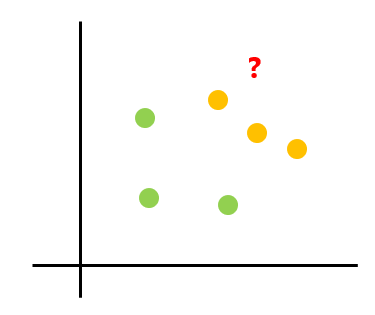

Knn(K-nearest neighbor) 위와 같이 물음표를 예측할 때 물음표와 가까운 점의 개수로 예측한다.

K가 1인 경우 가장 가까운 한개의 점으로 예측한다. 위에서 K가 3인 경우 주황색 3개랑 가까우므로 주황색으로 예측한다

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_score = metrics.accuracy_score(prediction,y_test)
print('KNN 정확도는 :', round(accuracy_score,2))

KNN 정확도는 : 1.0


K에 따라 아래와 같이 정확도가 변한다.

<ipython-input-17-87c13b60f7b1>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


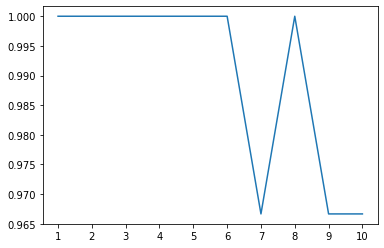

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()